In [29]:
import os

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set();

## Задаем пути

In [30]:
PROJECT_FOLDER: str = 'P:\\Python Projects\\EDA_cardio'
DATASET_NAME: str = 'cardio_train.csv'
DATA_PATH: str = os.path.join(PROJECT_FOLDER, 'src', 'raw', DATASET_NAME)

RESULT_PATH: str = os.path.join(PROJECT_FOLDER, 'src', 'visualizations')

## Читаем

In [31]:
data = pd.read_csv(os.path.join(DATA_PATH), sep=';')

In [32]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
id,70000.0,49972.419900,28851.302323,0.0,25006.75,50001.5,74889.25,99999.0
age,70000.0,19468.865814,2467.251667,10798.0,17664.00,19703.0,21327.00,23713.0
gender,70000.0,1.349571,0.476838,1.0,1.00,1.0,2.00,2.0
height,70000.0,164.359229,8.210126,55.0,159.00,165.0,170.00,250.0
weight,70000.0,74.205690,14.395757,10.0,65.00,72.0,82.00,200.0
ap_hi,70000.0,128.817286,154.011419,-150.0,120.00,120.0,140.00,16020.0
ap_lo,70000.0,96.630414,188.472530,-70.0,80.00,80.0,90.00,11000.0
cholesterol,70000.0,1.366871,0.680250,1.0,1.00,1.0,2.00,3.0
gluc,70000.0,1.226457,0.572270,1.0,1.00,1.0,1.00,3.0
smoke,70000.0,0.088129,0.283484,0.0,0.00,0.0,0.00,1.0


# Для каждой фичи строим графики

## Столбчатые диаграммы

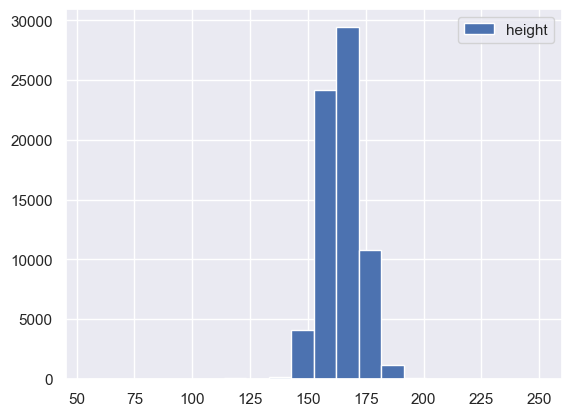

In [33]:
data['height'].hist(bins=20, legend='height');

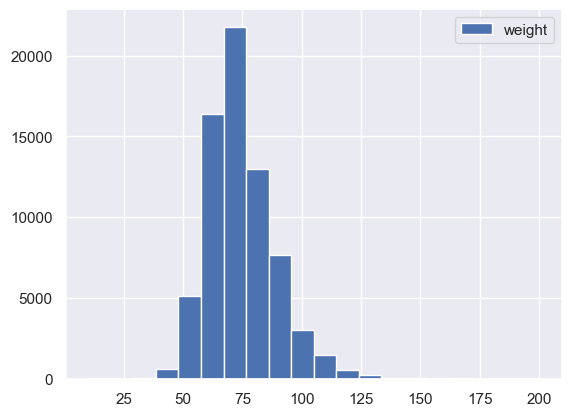

In [34]:
data['weight'].hist(bins=20, legend='weight');

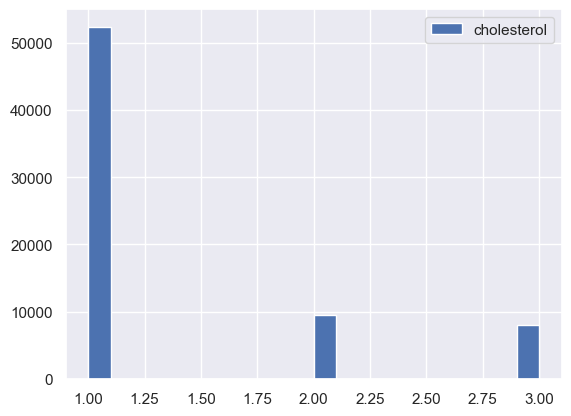

In [35]:
data['cholesterol'].hist(bins=20, legend='cholesterol');

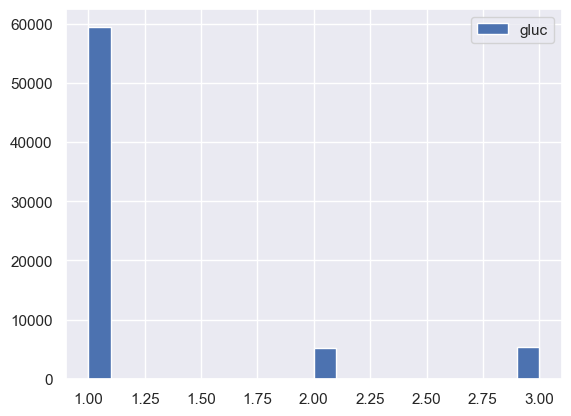

In [36]:
data['gluc'].hist(bins=20, legend='gluc');

## Ящики с усами

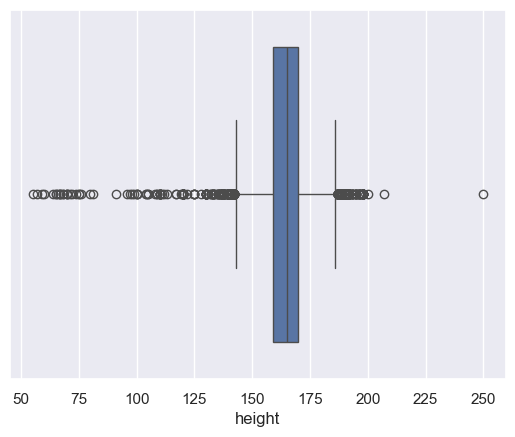

In [37]:
sns.boxplot(x = data['height']);

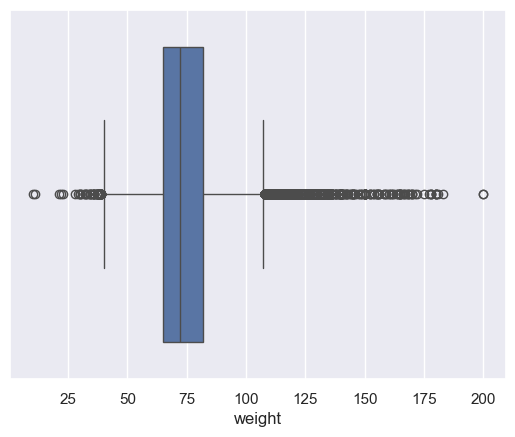

In [38]:
sns.boxplot(x = data['weight']);

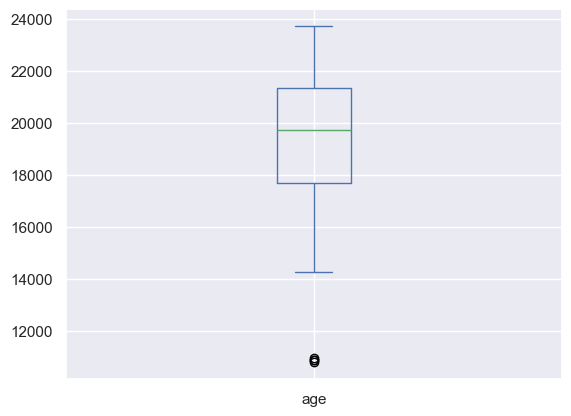

In [39]:
data.plot.box(column=['age']);

## Исследуем признаки совместно

In [40]:
# Обратите внимание - мы применяем здесь метод, а не функцию round. Это значительно ускоряет вычисления
# Операция "деления столбца на число" работает интуитивно понятно - 
# каждый элемент делится на это число. Магия NumPy в действии!
data['age'] = (data['age'] / 365).round()

In [41]:
# Синтаксис предельно прост, лаконичен и интуитивно понятен
data.groupby('cardio')['age'].mean()

cardio
0    51.731218
1    54.948083
Name: age, dtype: float64

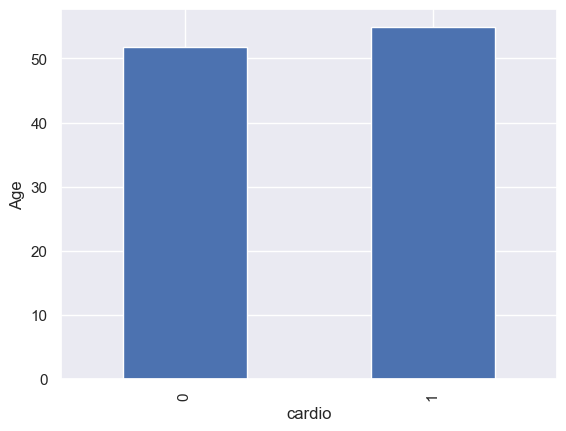

In [42]:
data.groupby('cardio')['age'].mean().plot(kind='bar') 
plt.ylabel('Age') # добавляем подпись на оси Оу
plt.show();

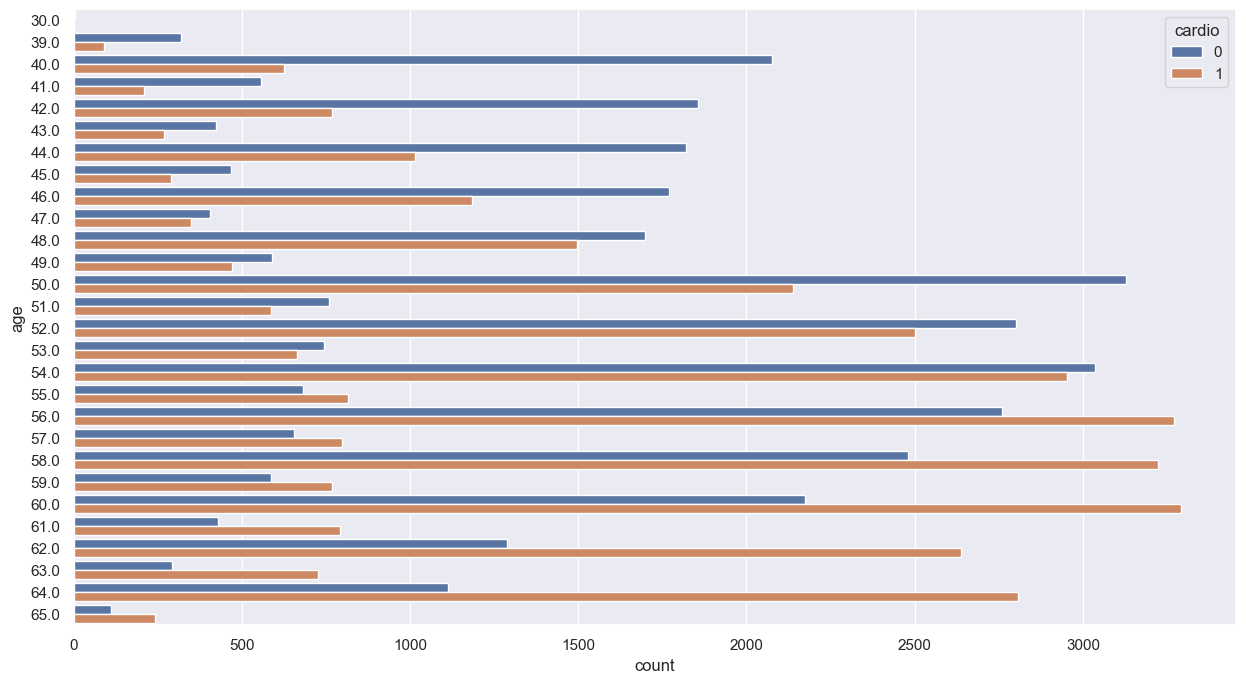

In [43]:
plt.figure(figsize=(15, 8)) # увеличим размер картинки
sns.countplot(y='age', hue='cardio', data=data);

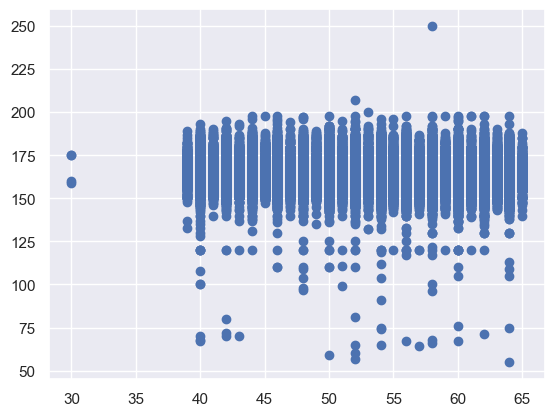

In [44]:
plt.scatter(data['age'], data['height']);

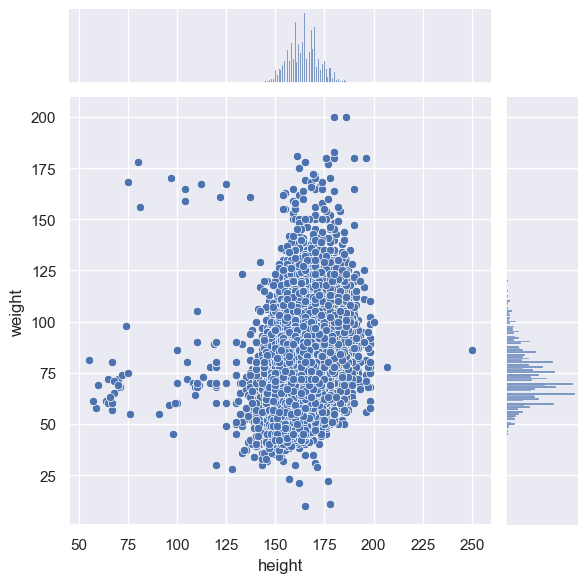

In [45]:
sns.jointplot(x='height', y='weight', data=data);